# Importando bibliotecas

In [111]:
import zipfile #extrair o zip
from io import BytesIO #reconhecer numeros binarios e converter 
from PIL import Image 
import matplotlib.pyplot as plt #plotar graficos 
import os #SO do computador 
import shutil #para manipulação de arquivos e diretorios 
import pandas as pd 

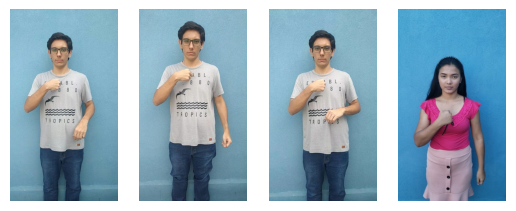

                                      Nomes dos Arquivos
0               30 FPS/30 FPS/test/I/I_1605967125.294393
1              30 FPS/30 FPS/test/I/I_1605967125.2944071
2               30 FPS/30 FPS/test/I/I_1605967125.294418
3              30 FPS/30 FPS/test/I/I_1605967125.2944283
4              30 FPS/30 FPS/test/I/I_1605967125.2944384
...                                                  ...
12993  validation/validation/your/your_1605967469.049...
12994  validation/validation/your/your_1605967469.049...
12995  validation/validation/your/your_1605967469.049...
12996  validation/validation/your/your_1605967469.049...
12997  validation/validation/your/your_1605967469.049...

[12998 rows x 1 columns]


In [112]:
def extrair_e_exibir_imagens(caminho_arquivo_zip, num_imagens_a_exibir=4):
    # criação de um diretório temporario
    dir_temporario_extracao = "temp_imagens_extraidas"

    os.makedirs(dir_temporario_extracao, exist_ok=True)

    try:
        # extração do zip
        with zipfile.ZipFile(caminho_arquivo_zip, "r") as zip_ref:
            # Listar todos os arquivos extraídos
            arquivos_extraidos = zip_ref.namelist()

            # exibir as primeiras fotos do diretorio
            for i, nome_arquivo in enumerate(arquivos_extraidos[:num_imagens_a_exibir]):
                caminho_arquivo = os.path.join(dir_temporario_extracao, nome_arquivo)

                zip_ref.extract(nome_arquivo, dir_temporario_extracao)

                # ler e mostrar a imagem
                with Image.open(caminho_arquivo) as img:
                    plt.subplot(1, num_imagens_a_exibir, i + 1)
                    plt.imshow(img)
                    plt.axis("off")

            plt.show()

    except Exception as e:
        print(f"Falha ao processar o arquivo zip: {str(e)}")

    finally:
        # remove o diretorio temporario
        shutil.rmtree(dir_temporario_extracao, ignore_errors=True)


# Caminho para o arquivo zipado
# caminho_arquivo_zip = "C:/Users/fllsa/Music/redes/ReconhecimentoDeSinais/archive.zip"
caminho_arquivo_zip = r"C:\Users\libhi\projetoSinais\ReconhecimentoDeSinais\dataset_SignLanguage.zip"

# Número de imagens para exibir
num_imagens_a_exibir = 4

extrair_e_exibir_imagens(caminho_arquivo_zip, num_imagens_a_exibir)

# Adicionando as labels 

# Lista para armazenar os nomes dos arquivos
nomes_arquivos_zip = ['Bank', 'Bus', 'Car', 'Formation', 'Hospital', 'I', 'Man', 'Motorcycle', 'My', 'Supermarket', 'We', 'Woman', 'You', 'You (plural)', 'Your']

# Extrair os nomes dos arquivos no zip
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    nomes_arquivos_zip = zip_ref.namelist()

# Criar um DataFrame pandas com os nomes dos arquivos
df_nomes_arquivos = pd.DataFrame({"Nomes dos Arquivos": nomes_arquivos_zip})

# Exibir o DataFrame
print(df_nomes_arquivos)


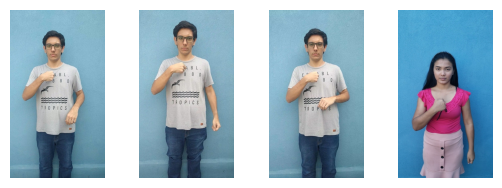

,T/T/V,Label,File
0,test,I,I_1605967125.294393
1,test,I,I_1605967125.2944071
2,test,I,I_1605967125.294418
3,test,I,I_1605967125.2944283
4,test,I,I_1605967125.2944384


In [122]:
def extract_info_from_file_path(file_path):
    # Split the file path into components
    components = file_path.split('/')
    
    # Extract the desired information
    third_to_last_folder = components[-3]
    penultimate_folder = components[-2]
    filename = components[-1]
    
    return third_to_last_folder, penultimate_folder, filename

# Function to extract and display images
def extract_and_display_images(zip_file_path, num_images_to_display=4):
    # Temporary extraction directory
    temp_extraction_dir = "temp_extracted_images"

    os.makedirs(temp_extraction_dir, exist_ok=True)

    try:
        with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
            extracted_files = zip_ref.namelist()

            # Display the first few images
            for i, nome_arquivo in enumerate(extracted_files[:num_images_to_display]):
                caminho_arquivo = os.path.join(temp_extraction_dir, nome_arquivo)

                zip_ref.extract(nome_arquivo, temp_extraction_dir)

                # ler e mostrar a imagem
                with Image.open(caminho_arquivo) as img:
                    plt.subplot(1, num_images_to_display, i + 1)
                    plt.imshow(img)
                    plt.axis("off")

            plt.show()

    except Exception as e:
        print(f"Failed to process the zip file: {str(e)}")

    finally:
        shutil.rmtree(temp_extraction_dir, ignore_errors=True)


# Path to the zip file
zip_file_path = r"C:\Users\libhi\projetoSinais\ReconhecimentoDeSinais\dataset_SignLanguage.zip"

# Number of images to display
num_images_to_display = 4

# Extract and display images
extract_and_display_images(zip_file_path, num_images_to_display)

# Extracting file names from the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()

# Extracting information from file paths
file_info = [extract_info_from_file_path(file_path) for file_path in file_names]

# Creating a DataFrame with the extracted information
df_file_info = pd.DataFrame(file_info, columns=['T/T/V', 'Label', 'File'])

# Displaying the DataFrame
df_file_info.head()

In [114]:
# def extrair_e_exibir_imagens(caminho_arquivo_zip, num_imagens_a_exibir=4):
#     # criação de um diretório temporario
#     dir_temporario_extracao = "temp_imagens_extraidas"

#     os.makedirs(dir_temporario_extracao, exist_ok=True)

#     try:
#         # extração do zip
#         with zipfile.ZipFile(caminho_arquivo_zip, "r") as zip_ref:
#             # Listar todos os arquivos extraídos
#             arquivos_extraidos = zip_ref.namelist()

#             # exibir as primeiras fotos do diretorio
#             for i, nome_arquivo in enumerate(arquivos_extraidos[:num_imagens_a_exibir]):
#                 caminho_arquivo = os.path.join(dir_temporario_extracao, nome_arquivo)

#                 zip_ref.extract(nome_arquivo, dir_temporario_extracao)

#                 # ler e mostrar a imagem
#                 with Image.open(caminho_arquivo) as img:
#                     plt.subplot(1, num_imagens_a_exibir, i + 1)
#                     plt.imshow(img)
#                     plt.axis("off")

#             plt.show()

#     except Exception as e:
#         print(f"Falha ao processar o arquivo zip: {str(e)}")

#     finally:
#         # remove o diretorio temporario
#         shutil.rmtree(dir_temporario_extracao, ignore_errors=True)

# def extract_labels_from_filenames(nomes_arquivos):
#     labels = ['Bank', 'Bus', 'Car', 'Formation', 'Hospital', 'I', 'Man', 'Motorcycle', 'My', 'Supermarket', 'We', 'Woman', 'You', 'You (plural)', 'Your']
#     label_dict = {label: [] for label in labels}

#     for nome in nomes_arquivos:
#         for label in labels:
#             if label.lower() in nome.lower():
#                 label_dict[label].append(1)
#             else:
#                 label_dict[label].append(0)

#     return label_dict

# # Caminho para o arquivo zipado
# caminho_arquivo_zip = r"C:\Users\libhi\projetoSinais\ReconhecimentoDeSinais\dataset_SignLanguage.zip"

# # Adicionando as labels
# with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
#     nomes_arquivos_zip = zip_ref.namelist()

# labels_dict = extract_labels_from_filenames(nomes_arquivos_zip)

# # Criar um DataFrame pandas com os nomes dos arquivos e as labels
# df_nomes_arquivos = pd.DataFrame(labels_dict)

# # Exibir o DataFrame
# print(df_nomes_arquivos)


In [115]:
df_file_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12998 entries, 0 to 12997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T/T/V   12998 non-null  object
 1   Label   12998 non-null  object
 2   File    12998 non-null  object
dtypes: object(3)
memory usage: 304.8+ KB


In [116]:
print(df_file_info)

            T/T/V Label                     File
0            test     I      I_1605967125.294393
1            test     I     I_1605967125.2944071
2            test     I      I_1605967125.294418
3            test     I     I_1605967125.2944283
4            test     I     I_1605967125.2944384
...           ...   ...                      ...
12993  validation  your  your_1605967469.0494037
12994  validation  your  your_1605967469.0494146
12995  validation  your  your_1605967469.0494275
12996  validation  your  your_1605967469.0494397
12997  validation  your  your_1605967469.0494523

[12998 rows x 3 columns]


In [117]:
# Dividir o dataset
classes = df_file_info['Label'].unique()
print(classes)

['I' 'bank' 'bus' 'car' 'formation' 'hospital' 'man' 'motorcycle' 'my'
 'supermarket' 'we' 'woman' 'you (plural)' 'you' 'your']


In [118]:
# Separating into different datasets based on 'Third_to_last_folder'
test_dataset = df_file_info[df_file_info['T/T/V'] == 'test']

# Displaying the DataFrames
print("Test Dataset:")
print(test_dataset)

Test Dataset:
     T/T/V Label                     File
0     test     I      I_1605967125.294393
1     test     I     I_1605967125.2944071
2     test     I      I_1605967125.294418
3     test     I     I_1605967125.2944283
4     test     I     I_1605967125.2944384
...    ...   ...                      ...
1840  test  your  your_1605967125.2895226
1841  test  your   your_1605967125.289536
1842  test  your  your_1605967125.2895467
1843  test  your  your_1605967125.2895591
1844  test  your  your_1605967125.2895713

[1845 rows x 3 columns]


In [119]:
train_dataset = df_file_info[df_file_info['T/T/V'] == 'train']
validation_dataset = df_file_info[df_file_info['T/T/V'] == 'validation']

# Displaying the DataFrames
print("Train Dataset:")
print(train_dataset)
print("\nValidation Dataset:")
print(validation_dataset)

Train Dataset:
      T/T/V Label                     File
1845  train     I     I_1605967420.9372084
1846  train     I     I_1605967420.9372222
1847  train     I     I_1605967420.9372318
1848  train     I     I_1605967420.9372416
1849  train     I     I_1605967420.9372516
...     ...   ...                      ...
9226  train  your  your_1605967420.9122114
9227  train  your  your_1605967420.9122274
9228  train  your  your_1605967420.9122422
9229  train  your  your_1605967420.9122605
9230  train  your  your_1605967420.9122758

[7386 rows x 3 columns]

Validation Dataset:
            T/T/V Label                     File
9231   validation     I     I_1605967469.0635996
9232   validation     I      I_1605967469.063616
9233   validation     I     I_1605967469.0636299
9234   validation     I      I_1605967469.063642
9235   validation     I     I_1605967469.0636528
...           ...   ...                      ...
12993  validation  your  your_1605967469.0494037
12994  validation  your  your_1